In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp


In [5]:
x = sp.symbols('x')

In [6]:
f = sp.sqrt(1+x**2)
fp = sp.diff(f,x)
fpp = sp.diff(f,x,2)
fppp = sp.diff(fpp,x)
fpppp = sp.diff(fppp,x)

In [7]:
fppp

-x*(-x**2/(x**2 + 1) + 1)/(x**2 + 1)**(3/2) + (2*x**3/(x**2 + 1)**2 - 2*x/(x**2 + 1))/sqrt(x**2 + 1)

In [8]:
def taylor_series(f, x , n):
    return sp.diff(f,x,n)

In [14]:
taylor_series(f,x,3)

3*x*(x**2/(x**2 + 1) - 1)/(x**2 + 1)**(3/2)

In [15]:
def taylor_series(f, x, a, n):
    """
    f : sympy expression
    x : sympy symbol
    a : point of expansion
    n : order of the series
    """
    series = 0
    for k in range(n+1):
        term = (sp.diff(f, x, k).subs(x, a)) * (x - a)**k / sp.factorial(k)
        series += term
    return sp.simplify(series)


In [16]:
x = sp.symbols('x')
f = sp.exp(x)

taylor = taylor_series(f, x, 0, 5)  # 5th order around a=0
print("Taylor polynomial:", taylor)
print("Numeric check at x=1:", taylor.subs(x, 1).evalf())
print("Exact f(1):", sp.exp(1).evalf())


Taylor polynomial: x**5/120 + x**4/24 + x**3/6 + x**2/2 + x + 1
Numeric check at x=1: 2.71666666666667
Exact f(1): 2.71828182845905


In [2]:
# Example usage:
X = sp.Symbol('X')
f_expr = 1 / (3*X - X**2)
a = 1  # center
n = 4  # degree

taylor_poly = taylor_series(f_expr, X, a, n)
print("Taylor Polynomial around x=1 up to degree 4:")
print(taylor_poly)

# If you want a numerical approximation function:
taylor_func = sp.lambdify(X, taylor_poly, 'numpy')

# Example: approximate f(1.2)
approx_value = taylor_func(1.2)
print(f"\nApproximation of f(1.2): {approx_value}")

# Compare with true value
true_value = float(f_expr.subs(X, 1.2))
print(f"True value: {true_value}")
print(f"Error: {abs(true_value - approx_value)}")

NameError: name 'taylor_series' is not defined

Taylor polynomial of degree 4 centered at x = 1:
    4       3       2            
11⋅x    27⋅x    27⋅x    53⋅x   57
───── - ───── + ───── - ──── + ──
 32      16       8      16    32


<lambdifygenerated-1>:2: RuntimeWarning: divide by zero encountered in reciprocal
  return (-x**2 + 3*x)**(-1.0)


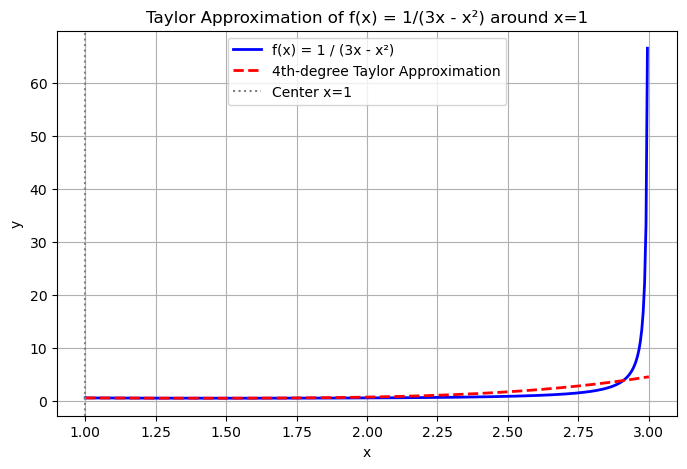

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Define symbols and function
x = sp.Symbol('x')
f = 1 / (3*x - x**2)

# Center and degree
a = 1
n = 4

# Compute Taylor series symbolically
taylor_poly = 0
for i in range(n + 1):
    term = sp.diff(f, x, i).subs(x, a) * (x - a)**i / sp.factorial(i)
    taylor_poly += term
taylor_poly = sp.simplify(taylor_poly)

print("Taylor polynomial of degree 4 centered at x = 1:")
sp.pprint(taylor_poly)

# Convert symbolic expressions to numerical functions
f_np = sp.lambdify(x, f, 'numpy')
taylor_np = sp.lambdify(x, taylor_poly, 'numpy')

# Generate x values
x_vals = np.linspace(1, 3, 400)
f_vals = f_np(x_vals)
taylor_vals = taylor_np(x_vals)

# Plot
plt.figure(figsize=(8,5))
plt.plot(x_vals, f_vals, label='f(x) = 1 / (3x - x²)', color='blue', linewidth=2)
plt.plot(x_vals, taylor_vals, label='4th-degree Taylor Approximation', color='red', linestyle='--', linewidth=2)
plt.axvline(a, color='gray', linestyle=':', label='Center x=1')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Taylor Approximation of f(x) = 1/(3x - x²) around x=1')
plt.legend()
plt.grid(True)
plt.show()
